# Analyzing tournament event data with Pandas, Numpy, and Matplotlib

### Section I: Analyzing the number of events and entrants over time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the data into our dataframe
df = pd.read_csv('liquipedia-event-data-raw.csv')

In [3]:
#dropping tournaments that don't contain a value for 'Entrants'
df.dropna(subset=['Entrants'], axis=0, inplace=True)

In [4]:
#we need to clean / remove some non-numeric characters before we convert the data type to int
df['Entrants'] = df['Entrants'].str.replace('entrants', '').str.rstrip()
df['Entrants'] = df['Entrants'].str.replace(',', '')
df['Entrants'] = df['Entrants'].astype('int64')

In [5]:
#confirm that Entrants are now stored as integers
df.dtypes

Tournament_Name    object
Date               object
Prize              object
Entrants            int64
Location           object
Winner             object
dtype: object

In [6]:
#adding a column for 'YEAR' to compare year-on-year growth/decline for event attendance
df['Year'] = df['Date'].str[-4:]
df['Year'] = df['Year'].astype('int64')

In [7]:
#groupby year, and look at the total sum of entrants for all events:
df.groupby('Year')['Entrants'].sum()

Year
2003      250
2004      484
2005     1131
2006     1582
2007     2080
2008      530
2009     1162
2010     1426
2011     1363
2012     1511
2013     2906
2014     9613
2015    23894
2016    26405
2017    25302
2018    18738
2019    18244
2020     2576
Name: Entrants, dtype: int64

In [8]:
#because the 2020 season has just started (and is incomplete), let's drop that data:
df = df[df['Year'] != 2020].copy()

In [9]:
#group by the total numbers of entrants per year, and make a label
entrants_per_year = df.groupby('Year')['Entrants'].sum()
years_label = [year for year, df in df.groupby('Year')]

In [10]:
#get the end-point
last_x = df["Year"].iloc[0]
last_y = entrants_per_year.tail(1)

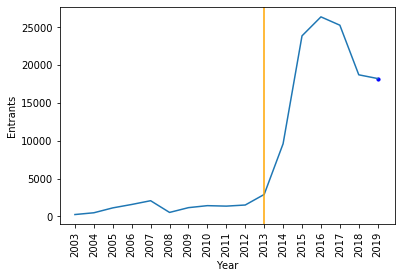

In [11]:
#now let's plot this data...
fig, ax = plt.subplots()
ax.plot(entrants_per_year)

plt.xlabel('Year')
plt.ylabel('Entrants')
plt.xticks(years_label, rotation='vertical')

#the orange line indicates the release of the melee documentary
plt.axvline(x=2013, c='orange')
ax.scatter(last_x, last_y, c='blue', s=10)

plt.show();

### As seen above, event _attendance_ continues to remain high, but what about the number of events annually?

In [12]:
#let's get a series of the number of events:
events_per_year = df.groupby('Year')['Tournament_Name'].count()

In [13]:
#get the end-point
last_x = df["Year"].iloc[0]
last_y = events_per_year.tail(1)

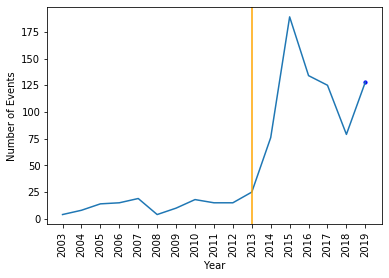

In [14]:
#plot it out
fix, ax = plt.subplots()
ax.plot(events_per_year)

plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(years_label, rotation='vertical')

#the orange line indicates the release of the melee documentary
plt.axvline(x=2013, c='orange')
ax.scatter(last_x, last_y, c='blue', s=10)

plt.show();

#### FIndings: although they weren't record-breaking years, both the _raw number of events_ and _level of attendees_ held strong in 2019.

### (Extra) What does a linear regression for the number of entrants look like?

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#make a dataframe that only contains the number of entrants per year:
df_for_lg = df.groupby('Year')['Entrants'].sum()
df_for_lg = df_for_lg.reset_index()

In [17]:
df_for_lg.tail()

,Year,Entrants
12,2015,23894
13,2016,26405
14,2017,25302
15,2018,18738
16,2019,18244


In [18]:
#create a linear regression object:
lm=LinearRegression()

In [19]:
#define our independent/dependent variables:
x_vals = df_for_lg[['Year']]
y_vals = df_for_lg[['Entrants']]

In [20]:
#fit the model:
lm.fit(x_vals, y_vals)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#make predictions based on the x values:
pred_y_vals = lm.predict(x_vals)
pred_y_vals

array([[-4884.03921569],
       [-3268.96813725],
       [-1653.89705882],
       [  -38.82598039],
       [ 1576.24509804],
       [ 3191.31617647],
       [ 4806.3872549 ],
       [ 6421.45833333],
       [ 8036.52941176],
       [ 9651.6004902 ],
       [11266.67156863],
       [12881.74264706],
       [14496.81372549],
       [16111.88480392],
       [17726.95588235],
       [19342.02696078],
       [20957.09803922]])

In [22]:
lm.intercept_ #B0

array([-3239871.40931373])

In [25]:
lm.coef_ #B1

array([[1615.07107843]])

Text(0, 0.5, 'Entrants')

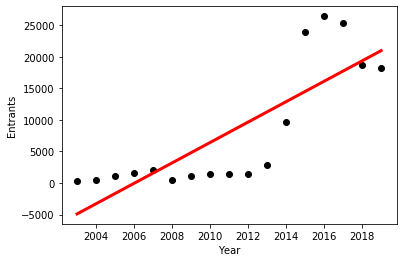

In [26]:
#Plot the original points, as well as a blue line for our projected data;
plt.scatter(x_vals, y_vals,  color='black')
plt.plot(x_vals, pred_y_vals, color='red', linewidth=3)
plt.xlabel("Year")
plt.ylabel("Entrants")

In [27]:
#what does the model think that attendance numbers will look like in 2025?
lm.predict([[2025]])

array([[30647.5245098]])

## The results:
### The number of entrants clealry isn't linear, and can't be estimated with a simple linear model.

In [28]:
df_for_lg

,Year,Entrants
0,2003,250
1,2004,484
2,2005,1131
3,2006,1582
4,2007,2080
5,2008,530
6,2009,1162
7,2010,1426
8,2011,1363
9,2012,1511


In [29]:
import seaborn as sns

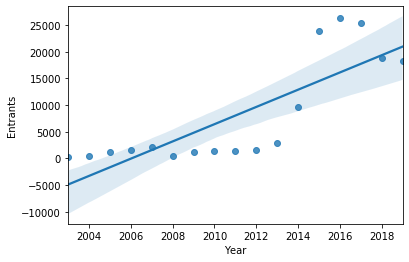

In [30]:
sns.regplot(x='Year', y='Entrants', data=df_for_lg)

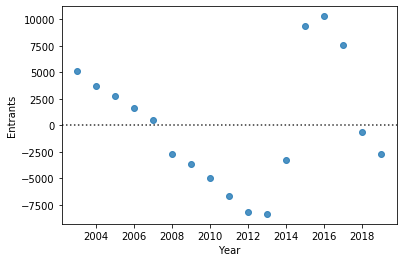

In [31]:
sns.residplot(df_for_lg['Year'], df_for_lg['Entrants'])

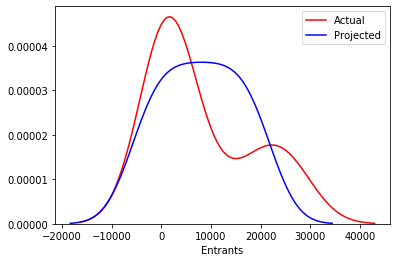

In [44]:
ax1 = sns.distplot(df_for_lg['Entrants'], hist=False, color='r', label='Actual')
sns.distplot(pred_y_vals, hist=False, color='b', label='Projected')